# Plotting Hysteresis and other things for ESS pi meeting 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression
import os
import matplotlib.collections as mcoll

# shear stress
shear_stress_2021 = pd.read_csv('mobile_shear_stress_2021.csv', parse_dates=['time'], index_col='time')
shear_stress_2022 = pd.read_csv('mobile_shear_stress_2022.csv', parse_dates=['time'], index_col='time')
shear_stress_2023 = pd.read_csv('mobile_shear_stress_2023.csv', parse_dates=['time'], index_col='time')

# nutrient data
storm_directory = 'summer_storms'
storms = {} # storm dictionary
for filename in os.listdir(storm_directory):
    # check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(storm_directory, filename) # construct the full file path
        df = pd.read_csv(file_path)                         # read the CSV file into a data frame
        df = df.dropna(subset=['Date_Time'])                # drop rows where 'Date/Time' is NaN  
        df['Date_Time'] = pd.to_datetime(df['Date_Time'])   # convert to datetime format
        df = df.set_index('Date_Time')                      # set date time as the index 
        df = df.dropna(how='all', axis=1)                   # drop columns where all values are NaN
        key = filename[:-4]                                 # remove the '.csv' from the filename to use as the dictionary key
        storms[key] = df                                    # store the data frame in the dictionary

spring = pd.read_csv('spring_events/SP23_up_constituents.csv', parse_dates=['Date_Time'], index_col='Date_Time')

In [2]:
storms.keys()

dict_keys(['st1_down', 'st1_up', 'st2_down', 'st3_down', 'st4_down', 'st4_up', 'st5_down', 'st5_up', 'st6_up', 'st7_down', 'st7_up'])

In [3]:
def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """
    # Ensure z is a 1D array with the same length as x and y
    if z is None:
        z = np.arange(len(x))  # Use the index of the point as the color
    elif not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z] * len(x))
    else:
        z = np.asarray(z)

    # Remove NaN values
    mask = ~np.isnan(y)
    x, y = x[mask], y[mask]

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc

In [4]:
# merge the shear stress dataframes to the storm dataframes 
shear_stress_2021 = shear_stress_2021.resample('1T').interpolate()
shear_stress_2022 = shear_stress_2022.resample('1T').interpolate()
shear_stress_2023 = shear_stress_2023.resample('1T').interpolate()

storms['st1_down'] = pd.merge(storms['st1_down'], shear_stress_2021, left_index=True, right_index=True, how='left')
storms['st1_up'] = pd.merge(storms['st1_up'], shear_stress_2021, left_index=True, right_index=True, how='left')
storms['st2_down'] = pd.merge(storms['st2_down'], shear_stress_2022, left_index=True, right_index=True, how='left')
storms['st3_down'] = pd.merge(storms['st3_down'], shear_stress_2022, left_index=True, right_index=True, how='left')
storms['st4_down'] = pd.merge(storms['st4_down'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st4_up'] = pd.merge(storms['st4_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st5_down'] = pd.merge(storms['st5_down'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st5_up'] = pd.merge(storms['st5_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st6_up'] = pd.merge(storms['st6_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st7_down'] = pd.merge(storms['st7_down'], shear_stress_2023, left_index=True, right_index=True, how='left')
storms['st7_up'] = pd.merge(storms['st7_up'], shear_stress_2023, left_index=True, right_index=True, how='left')
spring = pd.merge(spring, shear_stress_2023, left_index=True, right_index=True, how='left')

In [5]:
storms['st1_down']

,SS (uL/L),SRP (mg/L),TP (mg/L),DOC (mg/L),POC (mg/L),PP (mg/L),fDOM,Turbidity,P2C,P3C,P2C_depth,P3C_depth,depth,0
Date_Time,,,,,,,,,,,,,,
2021-07-23 15:50:00,339.78248,0.062,0.360,9.18,51.660,1.19,249.27,91.20,2723.170033,2724.256253,16.103333,26.825267,26.825267,69.099470
2021-07-23 16:09:00,457.12000,0.088,0.445,12.63,50.228,1.63,236.32,256.63,2723.179359,2724.262816,17.035940,27.481640,27.481640,69.884853
2021-07-23 16:40:00,152.79000,0.088,0.248,13.39,14.502,0.77,377.89,76.14,2723.185071,2724.266408,17.607100,27.840833,27.840833,71.166266
2021-07-23 16:55:00,168.45000,0.083,0.214,13.00,11.681,0.50,413.81,100.94,2723.183121,2724.265220,17.412100,27.722033,27.722033,71.786305
2021-07-23 19:19:00,43.15000,0.053,0.097,12.87,6.411,0.10,515.85,22.13,2723.154470,2724.243058,14.546960,25.505847,25.505847,76.279338
2021-07-23 21:02:00,17.70000,0.047,0.077,11.55,4.805,0.07,506.48,11.14,2723.145268,2724.232969,13.626833,24.496887,24.496887,48.483626


### Plots

Summer - ST1

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\2921950024.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_SS_uL_L.jpg


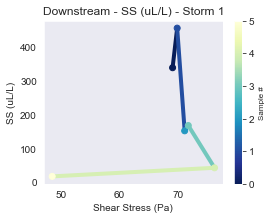

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_SRP_mg_L.jpg


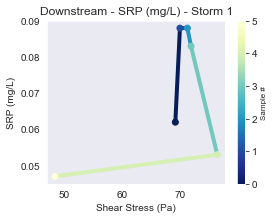

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_TP_mg_L.jpg


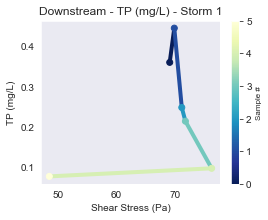

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_DOC_mg_L.jpg


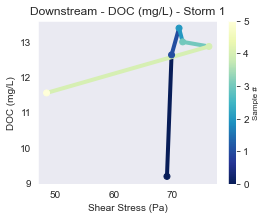

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_POC_mg_L.jpg


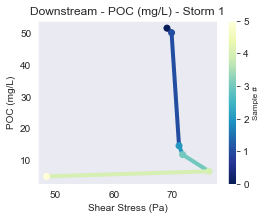

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_PP_mg_L.jpg


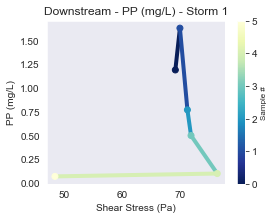

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_fDOM.jpg


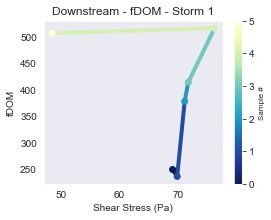

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_Turbidity.jpg


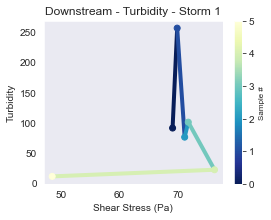

In [6]:
# single plot - downstream reach - storm 1
sns.set_style("darkgrid")
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_down']['0']))
    num_points = len(storms['st1_down']['0'])
    colorline(storms['st1_down']['0'], storms['st1_down'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_down']['0'], storms['st1_down'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Downstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_down_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\3459036494.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_SS_uL_L.jpg


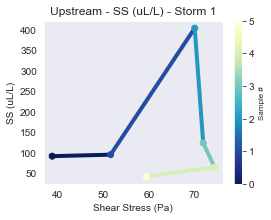

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_SRP_mg_L.jpg


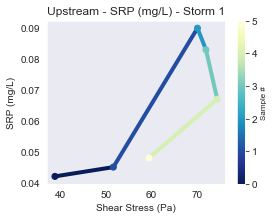

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_TP_mg_L.jpg


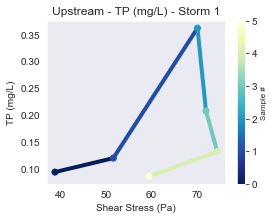

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_DOC_mg_L.jpg


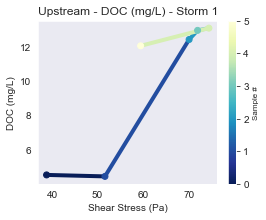

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_POC_mg_L.jpg


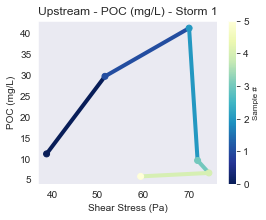

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_PP_mg_L.jpg


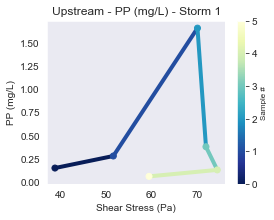

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_fDOM.jpg


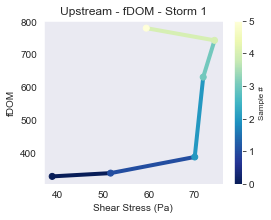

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_Turbidity.jpg


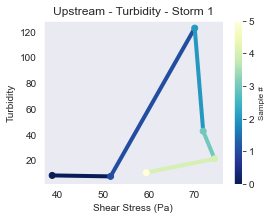

In [7]:
# single plot - upstream reach - storm 1
constituents = ['SS (uL/L)', 'SRP (mg/L)', 'TP (mg/L)', 'DOC (mg/L)', 'POC (mg/L)', 'PP (mg/L)', 'N (mg/L)', 'fDOM', 'Turbidity']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st1_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['0']))
    num_points = len(storms['st1_up']['0'])
    colorline(storms['st1_up']['0'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['0'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'Upstream - {constituent} - Storm 1', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/storm1_up_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\1283091650.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\1283091650.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


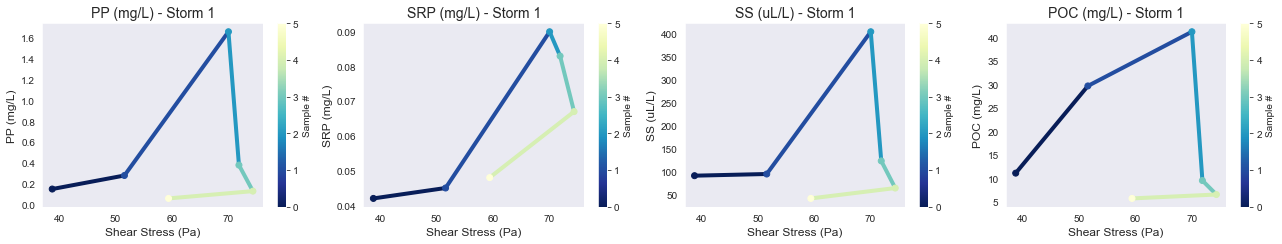

In [8]:
# All constituents - storm 1 - upstream
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
fig, axs = plt.subplots(1, len(constituents), figsize=(4.5*len(constituents), 3.5), constrained_layout=True)
cm = plt.cm.get_cmap('YlGnBu_r')
fig.tight_layout()

for ax, constituent in zip(axs, constituents):
    if constituent not in storms['st1_up'].columns:
        continue
    plt.sca(ax)  # set the current Axes to ax
    z = np.linspace(0, 1, len(storms['st1_up']['0']))
    num_points = len(storms['st1_up']['0'])
    colorline(storms['st1_up']['0'], storms['st1_up'][constituent], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    sc = ax.scatter(storms['st1_up']['0'], storms['st1_up'][constituent], c=range(num_points), cmap=cm, zorder=100)
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=10)
    ax.set_title(f'{constituent} - Storm 1', fontsize=14)
    ax.set_ylabel(f"{constituent}", fontsize=12)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=12)

plt.tight_layout()
fig.canvas.draw()  # force a render of the figure
plt.savefig("C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/all_summer.jpg", dpi=1000)
plt.show()

Summer - ST2

In [9]:
storms['st2_down']

,SS (uL/L),SRP (mg/L),TP (mg/L),DOC (mg/L),POC (mg/L),N (mg/L),PP (mg/L),LAB ID,fDOM,Turbidity,P2C,P3C,P2C_depth,P3C_depth,depth,0
Date_Time,,,,,,,,,,,,,,,,
2022-08-03 15:02:00,206.82,0.014906,0.099315,4.913,6.784,0.097,0.48,95,33.03,21.59,2723.133916,2724.203287,12.491593,21.528660,21.528660,4.763551
2022-08-03 15:17:00,142.53,0.071531,0.101267,6.550,5.715,0.013,0.40,96,47.92,19.97,2723.155489,2724.236409,14.648900,24.840880,24.840880,23.245311
2022-08-03 15:32:00,31.82,NaN,NaN,NaN,NaN,NaN,NaN,-,65.64,11.66,2723.154008,2724.234270,14.500847,24.627047,24.627047,21.165366
2022-08-03 15:47:00,55.06,0.054372,0.085650,8.035,3.149,0.000,0.14,97,64.42,10.48,2723.150976,2724.229757,14.197600,24.175747,24.175747,16.704262
2022-08-03 16:02:00,36.44,NaN,NaN,NaN,NaN,NaN,NaN,-,66.67,10.47,2723.151599,2724.227814,14.259853,23.981407,23.981407,14.230517
2022-08-03 16:17:00,66.04,NaN,NaN,8.691,2.088,0.000,NaN,98,70.53,13.01,2723.155256,2724.234504,14.625567,24.650380,24.650380,20.838384
2022-08-03 16:32:00,39.15,NaN,NaN,NaN,NaN,NaN,NaN,-,72.08,16.20,2723.152725,2724.231897,14.372500,24.389667,24.389667,18.492591
2022-08-03 17:02:00,23.32,NaN,NaN,NaN,NaN,NaN,NaN,-,74.64,13.67,2723.154008,2724.229991,14.500847,24.199080,24.199080,16.092132
2022-08-03 17:32:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,-,72.53,11.30,2723.150976,2724.228242,14.197600,24.024167,24.024167,14.977429


C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\157672710.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st2_PP_mg_L.jpg


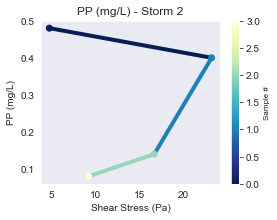

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st2_SRP_mg_L.jpg


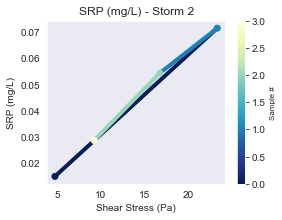

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st2_SS_uL_L.jpg


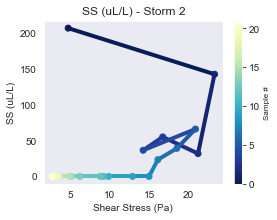

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st2_POC_mg_L.jpg


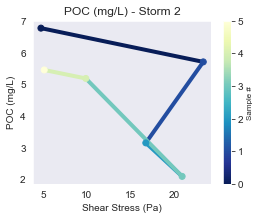

In [10]:
# single plot - downstream reach - storm 2
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st2_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st2_down'][constituent])
    x = storms['st2_down']['0'][mask]
    y = storms['st2_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 2', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st2_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

Summer - ST3

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\3832400198.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st3_PP_mg_L.jpg


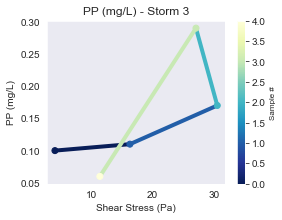

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st3_SRP_mg_L.jpg


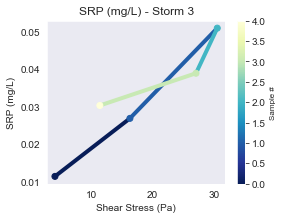

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st3_SS_uL_L.jpg


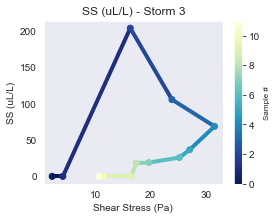

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st3_POC_mg_L.jpg


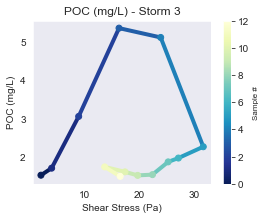

In [11]:
# single plot - downstream reach - storm 3
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st3_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st3_down'][constituent])
    x = storms['st3_down']['0'][mask]
    y = storms['st3_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 3', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st3_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

Summer - ST4

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\3404227276.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_SRP_mg_L.jpg


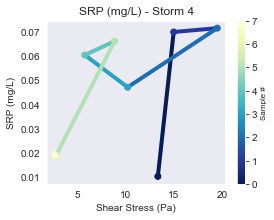

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_SS_uL_L.jpg


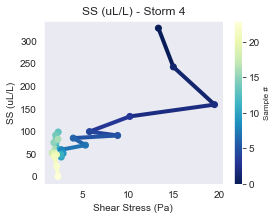

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_POC_mg_L.jpg


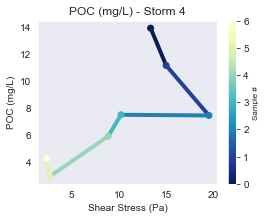

In [12]:
# single plot - downstream reach - storm 4
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['0'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\3404227276.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_SRP_mg_L.jpg


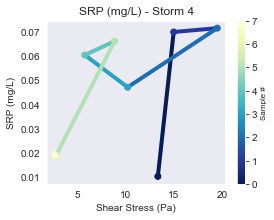

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_SS_uL_L.jpg


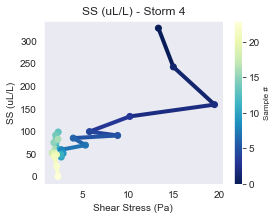

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_POC_mg_L.jpg


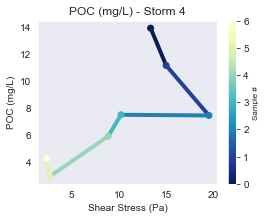

In [13]:
# single plot - downstream reach - storm 4
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st4_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st4_up'][constituent])
    x = storms['st4_up']['0'][mask]
    y = storms['st4_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 4', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

Summer - ST5

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\772751814.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_SRP_mg_L.jpg


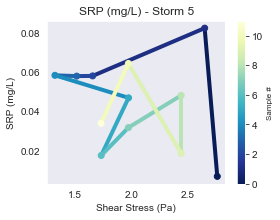

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_SS_uL_L.jpg


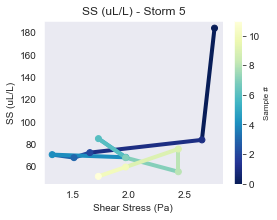

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_POC_mg_L.jpg


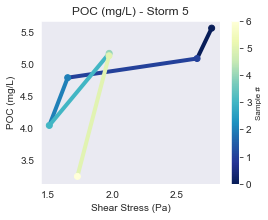

In [14]:
# single plot - downstream reach - storm 5
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_up'][constituent])
    x = storms['st5_up']['0'][mask]
    y = storms['st5_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st4_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\2560920609.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st5_SRP_mg_L.jpg


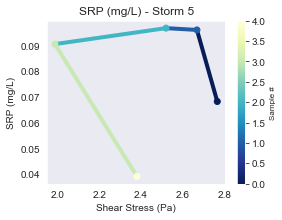

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st5_SS_uL_L.jpg


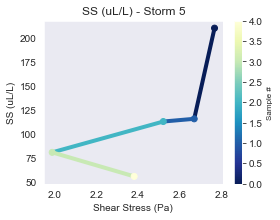

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st5_POC_mg_L.jpg


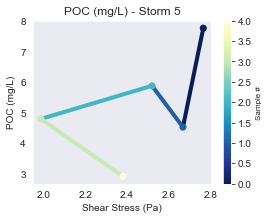

In [15]:
# single plot - downstream reach - storm 5
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st5_down'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st5_down'][constituent])
    x = storms['st5_down']['0'][mask]
    y = storms['st5_down'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 5', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st5_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

Summer - ST6

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\2743409379.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st6_SRP_mg_L.jpg


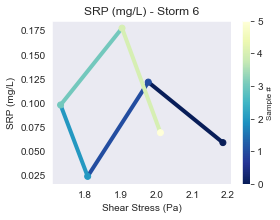

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st6_SS_uL_L.jpg


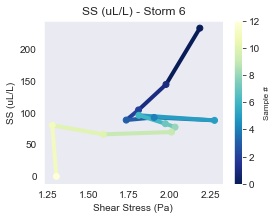

C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st6_POC_mg_L.jpg


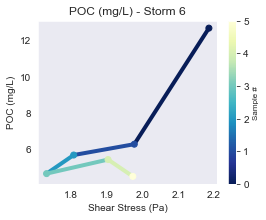

In [16]:
# single plot - downstream reach - storm 6
constituents = ['PP (mg/L)', 'SRP (mg/L)', 'SS (uL/L)', 'POC (mg/L)']
cm = plt.cm.get_cmap('YlGnBu_r')

for constituent in constituents:
    if constituent not in storms['st6_up'].columns:
        continue

    fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
    plt.sca(ax)  # set the current axes to ax
    
    # filter out NaN values
    mask = ~np.isnan(storms['st6_up'][constituent])
    x = storms['st6_up']['0'][mask]
    y = storms['st6_up'][constituent][mask]

    z = np.linspace(0, 1, len(x))
    num_points = len(x)
    colorline(x, y, z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
    
    # use a range of integers to represent colors
    c = np.arange(num_points)
    sc = ax.scatter(x, y, c=c, cmap=cm, zorder=100)
    
    ax.grid(False)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Sample #', size=8)
    ax.set_title(f'{constituent} - Storm 6', fontsize=12)
    ax.set_ylabel(f"{constituent}", fontsize=10)
    ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

    # replace special characters in the filename
    safe_constituent = constituent.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    filename = f"C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/st6_{safe_constituent}.jpg"
    print(filename)
    plt.savefig(filename, bbox_inches='tight', dpi=1000)
    plt.show()
    plt.close(fig)  # close the figure to free up memory

Spring Event 1

In [19]:
# event 1
event1_start = pd.Timestamp('2023-04-30 08:00:00') # start
event1_end = pd.Timestamp('2023-05-01 04:00:00') # end
event1 = spring[(spring.index >= event1_start) & (spring.index <= event1_end)]

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\3977714595.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


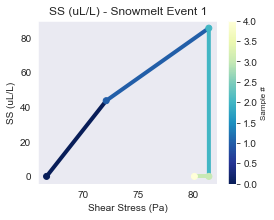

In [25]:
# plot SS hysteresis for event 1
fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
plt.sca(ax)  # set the current axes to ax
z = np.linspace(0, 1, len(event1['0']))
num_points = len(event1['0'])
colorline(event1['0'], event1['SS (uL/L)'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc = ax.scatter(event1['0'], event1['SS (uL/L)'], c=range(num_points), cmap=cm, zorder=100)
ax.grid(False)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Sample #', size=8)
ax.set_title(f'SS (uL/L) - Snowmelt Event 1', fontsize=12)
ax.set_ylabel(f"SS (uL/L)", fontsize=10)
ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

plt.savefig("C:/Users/nicol/Documents/GitHub/La_Jara/Hysteresis/ESSPI25_poster/plots/snowmelt_event1_SS.jpg", bbox_inches='tight', dpi=1000)

plt.show()

Spring Event 2

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\1752936026.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


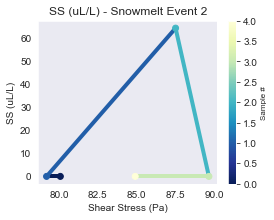

In [24]:
# event 2
event2_start = pd.Timestamp('2023-05-01 09:00:00') # start
event2_end = pd.Timestamp('2023-05-02 10:00:00') # end
event2 = spring[(spring.index >= event2_start) & (spring.index <= event2_end)]

# plot SS hysteresis for event 2
fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
plt.sca(ax)  # set the current axes to ax
z = np.linspace(0, 1, len(event2['0']))
num_points = len(event2['0'])
colorline(event2['0'], event2['SS (uL/L)'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc = ax.scatter(event2['0'], event2['SS (uL/L)'], c=range(num_points), cmap=cm, zorder=100)
ax.grid(False)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Sample #', size=8)
ax.set_title(f'SS (uL/L) - Snowmelt Event 2', fontsize=12)
ax.set_ylabel(f"SS (uL/L)", fontsize=10)
ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

plt.show()

Spring Event 3

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\3301652767.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


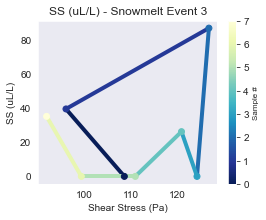

In [28]:
# event 3
event3_start = pd.Timestamp('2023-05-03 07:00:00') # start
event3_end = pd.Timestamp('2023-05-04 11:00:00') # end
event3 = spring[(spring.index >= event3_start) & (spring.index <= event3_end)]

# plot SS hysteresis for event 2
fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
plt.sca(ax)  # set the current axes to ax
z = np.linspace(0, 1, len(event3['0']))
num_points = len(event3['0'])
colorline(event3['0'], event3['SS (uL/L)'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc = ax.scatter(event3['0'], event3['SS (uL/L)'], c=range(num_points), cmap=cm, zorder=100)
ax.grid(False)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Sample #', size=8)
ax.set_title(f'SS (uL/L) - Snowmelt Event 3', fontsize=12)
ax.set_ylabel(f"SS (uL/L)", fontsize=10)
ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_28080\1442949737.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc, ax=ax)


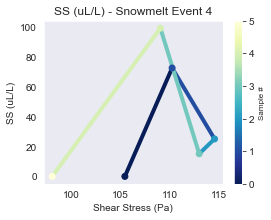

In [30]:
# event 3
event4_start = pd.Timestamp('2023-05-04 14:00:00') # start
event4_end = pd.Timestamp('2023-05-05 05:00:00') # end
event4 = spring[(spring.index >= event4_start) & (spring.index <= event4_end)]

# plot SS hysteresis for event 2
fig, ax = plt.subplots(figsize=(4, 3))  # create a new figure for each constituent
plt.sca(ax)  # set the current axes to ax
z = np.linspace(0, 1, len(event4['0']))
num_points = len(event4['0'])
colorline(event4['0'], event4['SS (uL/L)'], z, cmap=plt.get_cmap('YlGnBu_r'), linewidth=4)
sc = ax.scatter(event4['0'], event4['SS (uL/L)'], c=range(num_points), cmap=cm, zorder=100)
ax.grid(False)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Sample #', size=8)
ax.set_title(f'SS (uL/L) - Snowmelt Event 4', fontsize=12)
ax.set_ylabel(f"SS (uL/L)", fontsize=10)
ax.set_xlabel("Shear Stress (Pa)", fontsize=10)

plt.show()

Printing Peak Values

In [27]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['0'].idxmax()
    print(f"The peak shear stress for {storm_name} occurred at {peak_time} and was {storm_data['0'].max()} Pa")

The peak shear stress for st1_down occurred at 2021-07-23 19:19:00 and was 76.27933782270597 Pa
The peak shear stress for st1_up occurred at 2021-07-23 17:58:00 and was 74.39046798810453 Pa
The peak shear stress for st2_down occurred at 2022-08-03 15:17:00 and was 23.245310572663282 Pa
The peak shear stress for st3_down occurred at 2022-08-08 15:23:00 and was 31.5540949966101 Pa
The peak shear stress for st4_down occurred at 2023-07-29 15:37:00 and was 17.182533442451952 Pa
The peak shear stress for st4_up occurred at 2023-07-29 15:46:00 and was 19.491431786892658 Pa
The peak shear stress for st5_down occurred at 2023-08-13 18:45:00 and was 2.766400110559649 Pa
The peak shear stress for st5_up occurred at 2023-08-13 18:45:00 and was 2.766400110559649 Pa
The peak shear stress for st6_up occurred at 2023-08-28 13:35:00 and was 2.2756718023321625 Pa
The peak shear stress for st7_down occurred at 2023-09-14 17:52:00 and was 5.18778688826759 Pa
The peak shear stress for st7_up occurred at 2

In [ ]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['SS (uL/L)'].idxmax()
    print(f"The peak SS concentration for {storm_name} occurred at {peak_time} and was {storm_data['SS (uL/L)'].max()} uL/L")

The SS concentration for st1_down occurred at 2021-07-23 16:09:00 and was 457.12 uL/L
The SS concentration for st1_up occurred at 2021-07-23 16:13:00 and was 403.515 uL/L
The SS concentration for st2_down occurred at 2022-08-03 15:02:00 and was 206.82 uL/L
The SS concentration for st3_down occurred at 2022-08-08 14:28:00 and was 204.03 uL/L
The SS concentration for st4_down occurred at 2023-07-29 15:07:00 and was 271.06 uL/L
The SS concentration for st4_up occurred at 2023-07-29 15:16:00 and was 327.453 uL/L
The SS concentration for st5_down occurred at 2023-08-13 18:45:00 and was 210.458 uL/L
The SS concentration for st5_up occurred at 2023-08-13 18:45:00 and was 183.808 uL/L
The SS concentration for st6_up occurred at 2023-08-28 12:20:00 and was 232.052 uL/L
The SS concentration for st7_down occurred at 2023-09-14 18:37:00 and was 82.6 uL/L
The SS concentration for st7_up occurred at 2023-09-14 17:45:00 and was 95.963 uL/L


In [34]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['POC (mg/L)'].idxmax()
    print(f"The peak POC concentration for {storm_name} occurred at {peak_time} and was {storm_data['POC (mg/L)'].max()} mg/L")

The peak POC concentration for st1_down occurred at 2021-07-23 15:50:00 and was 51.66 mg/L
The peak POC concentration for st1_up occurred at 2021-07-23 16:13:00 and was 41.27935076 mg/L
The peak POC concentration for st2_down occurred at 2022-08-03 15:02:00 and was 6.784 mg/L
The peak POC concentration for st3_down occurred at 2022-08-08 14:28:00 and was 5.365 mg/L
The peak POC concentration for st4_down occurred at 2023-07-29 14:52:00 and was 29.943 mg/L
The peak POC concentration for st4_up occurred at 2023-07-29 15:16:00 and was 13.905 mg/L
The peak POC concentration for st5_down occurred at 2023-08-13 18:45:00 and was 7.778 mg/L
The peak POC concentration for st5_up occurred at 2023-08-13 18:45:00 and was 5.555 mg/L
The peak POC concentration for st6_up occurred at 2023-08-28 12:20:00 and was 12.67 mg/L
The peak POC concentration for st7_down occurred at 2023-09-14 17:52:00 and was 5.339 mg/L
The peak POC concentration for st7_up occurred at 2023-09-14 17:45:00 and was 5.137 mg/L


In [ ]:
for storm_name, storm_data in storms.items():
    peak_time = storm_data['SRP (mg/L)'].idxmax()
    print(f"The peak SRP concentration for {storm_name} occurred at {peak_time} and was {storm_data['SRP (mg/L)'].max()} mg/L")

# will give error, as there was no SRP for storm 7

The peak SRP concentration for st1_down occurred at 2021-07-23 16:09:00 and was 0.088 mg/L
The peak SRP concentration for st1_up occurred at 2021-07-23 16:13:00 and was 0.09 mg/L
The peak SRP concentration for st2_down occurred at 2022-08-03 15:17:00 and was 0.0715306 mg/L
The peak SRP concentration for st3_down occurred at 2022-08-08 14:58:00 and was 0.0509398 mg/L
The peak SRP concentration for st4_down occurred at 2023-07-29 15:37:00 and was 0.0757 mg/L
The peak SRP concentration for st4_up occurred at 2023-07-29 15:46:00 and was 0.0716 mg/L
The peak SRP concentration for st5_down occurred at 2023-08-13 19:02:00 and was 0.0968 mg/L
The peak SRP concentration for st5_up occurred at 2023-08-13 19:00:00 and was 0.0822 mg/L
The peak SRP concentration for st6_up occurred at 2023-08-28 13:20:00 and was 0.1773 mg/L


KeyError: 'SRP (mg/L)'

In [42]:
peak_time = event1['POC (mg/L)'].idxmax()
print(f"The peak POC concentration for event 1 occurred at {peak_time} and was {event1['POC (mg/L)'].max()} mg/L")
peak_time = event2['POC (mg/L)'].idxmax()
print(f"The peak POC concentration for event 2 occurred at {peak_time} and was {event2['POC (mg/L)'].max()} mg/L")
peak_time = event3['POC (mg/L)'].idxmax()
print(f"The peak POC concentration for event 3 occurred at {peak_time} and was {event3['POC (mg/L)'].max()} mg/L")
peak_time = event4['POC (mg/L)'].idxmax()
print(f"The peak POC concentration for event 4 occurred at {peak_time} and was {event4['POC (mg/L)'].max()} mg/L")

The peak POC concentration for event 1 occurred at nan and was nan mg/L
The peak POC concentration for event 2 occurred at nan and was nan mg/L
The peak POC concentration for event 3 occurred at nan and was nan mg/L
The peak POC concentration for event 4 occurred at 2023-05-04 20:00:00 and was 2.292 mg/L


In [44]:
peak_time = event1['SS (uL/L)'].idxmax()
print(f"The peak SS concentration for event 1 occurred at {peak_time} and was {event1['SS (uL/L)'].max()} mg/L")
peak_time = event2['SS (uL/L)'].idxmax()
print(f"The peak SS concentration for event 2 occurred at {peak_time} and was {event2['SS (uL/L)'].max()} mg/L")
peak_time = event3['SS (uL/L)'].idxmax()
print(f"The peak SS concentration for event 3 occurred at {peak_time} and was {event3['SS (uL/L)'].max()} mg/L")
peak_time = event4['SS (uL/L)'].idxmax()
print(f"The peak SS concentration for event 4 occurred at {peak_time} and was {event4['SS (uL/L)'].max()} mg/L")

The peak SS concentration for event 1 occurred at 2023-04-30 18:00:00 and was 85.5 mg/L
The peak SS concentration for event 2 occurred at 2023-05-01 20:00:00 and was 64.14 mg/L
The peak SS concentration for event 3 occurred at 2023-05-03 20:00:00 and was 87.1 mg/L
The peak SS concentration for event 4 occurred at 2023-05-05 02:00:00 and was 99.54 mg/L


In [45]:
peak_time = event1['0'].idxmax()
print(f"The peak shear stress concentration for event 1 occurred at {peak_time} and was {event1['0'].max()} Pa")
peak_time = event2['0'].idxmax()
print(f"The peak shear stress for event 2 occurred at {peak_time} and was {event2['0'].max()} Pa")
peak_time = event3['0'].idxmax()
print(f"The peak shear stress for event 3 occurred at {peak_time} and was {event3['0'].max()} Pa")
peak_time = event4['0'].idxmax()
print(f"The peak shear stress for event 4 occurred at {peak_time} and was {event4['0'].max()} Pa")

The peak shear stress concentration for event 1 occurred at 2023-04-30 23:00:00 and was 81.40522894237489 Pa
The peak shear stress for event 2 occurred at 2023-05-02 03:00:00 and was 89.6357007477942 Pa
The peak shear stress for event 3 occurred at 2023-05-03 20:00:00 and was 126.94703651171324 Pa
The peak shear stress for event 4 occurred at 2023-05-04 20:00:00 and was 114.5134445698842 Pa
